                                          # GOLD PRICE PREDICTION (Price 2008-2018) #


In [1]:
import numpy as np                                     #for operations on array
import matplotlib.pyplot as plt                        # for plotting data 
import sklearn as sk                                   # directly using inbuild formulaes
import seaborn as sns                                  # heatmap representation
from sklearn.ensemble import RandomForestRegressor      
from sklearn import metrics
import pandas as pd                                    # operations on dataframes
from sklearn.model_selection import train_test_split

In [2]:
# loading dataset
gold_data=pd.read_csv('V:\MY FILES\Gold price ML\gld_price_data.csv')

In [3]:
# printing first 5 & last five rows in dataset respectively
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()   # printing last five rows in dataset  

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
 gold_data.shape # get shape of data set
    

(2290, 6)

In [6]:
gold_data.info()  # get basic infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# get null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# get stats of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

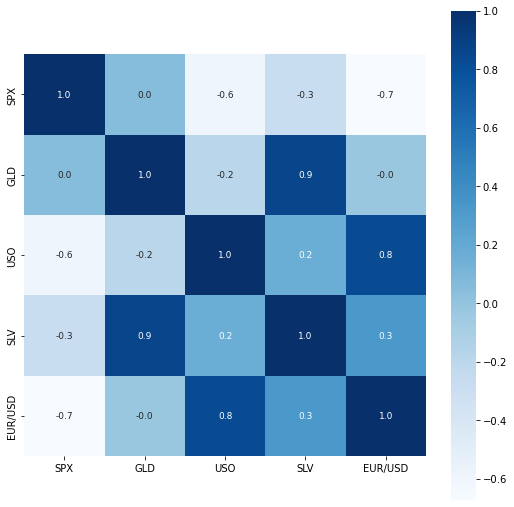

In [9]:
#correlation heatmap for GLD
correlation=gold_data.corr() 
plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':9}, cmap='Blues')


In [10]:
# correlation values for gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Count'>

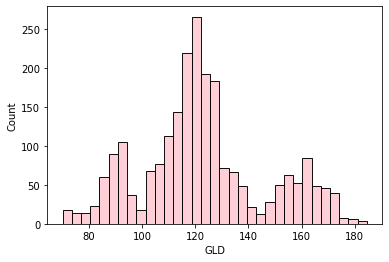

In [11]:
sns.histplot(gold_data['GLD'],color='pink')

In [12]:
#initialise values 
A=gold_data.drop(["GLD","Date"],axis='columns')
B=gold_data['GLD']
print(A)
print(B)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [13]:
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)


In [14]:
# model training 
regressor= RandomForestRegressor(n_estimators=100)
regressor.fit(A_train,B_train)

RandomForestRegressor()

In [15]:
# model eveluation
test_data_prediction=regressor.predict(A_test)
print(test_data_prediction)

[168.6791994   81.94219982 115.93479997 127.80430064 120.77470131
 154.86809763 150.21049832 126.01700046 117.58289874 126.14410043
 116.89200082 171.87660082 141.74239976 167.90819839 115.29080017
 117.71620057 138.7195024  170.31780154 159.3764024  163.02379938
 155.21940028 125.44809997 175.73789941 157.60830296 125.14360022
  93.90809996  77.93870025 120.35630013 118.97329886 167.45639936
  88.27510035 125.33219983  91.24180085 117.63880033 121.11479937
 136.20100024 115.5321013  114.7712006  148.56289936 107.03450104
 104.34880236  87.19489797 126.44610083 117.96959961 153.78139898
 119.59680037 108.27420032 107.97139804  93.27350043 127.30269703
  75.11670058 113.64019912 121.12810016 111.31799909 118.88129886
 120.47859964 159.15039985 169.40700061 147.01159699  85.78319836
  94.40480024  86.7691987   90.73039976 118.85870065 126.48610078
 127.4973999  170.3624     122.28119951 117.50719894  98.69640039
 168.20650164 143.23839848 132.53630254 121.3024024  120.97559947
 119.74150

In [16]:
# squared error
error_score=metrics.r2_score(B_test,test_data_prediction)
print("squared error is =",error_score)

squared error is = 0.9895927672893009


In [17]:
B_test=list(B_test)

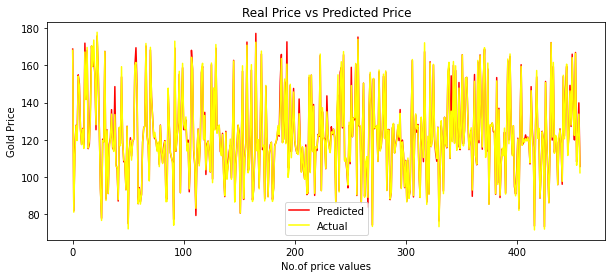

In [27]:
#plotting final graph to compare real price vs predicted price
plt.figure(figsize=(10,4))
plt.plot(test_data_prediction, color='red',label='Predicted Value')
plt.plot(B_test,color='yellow')
# plt.plot(test_data_prediction,colour='red',label='Predicted Price')

plt.xlabel('No.of price values')
plt.ylabel('Gold Price')
plt.title('Real Price vs Predicted Price')
plt.legend(['Predicted','Actual'])